<a href="https://colab.research.google.com/github/malbouis/Python_intro/blob/master/aulas_2020-2/aula10_ODE.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Integração e análise numérica

A integração numérica é composta por uma ampla gama de algoritmos para **calcular o valor numérico de uma integral definida**. 

O termo também é usado para se referir a métodos numéricos para determinar a solução de equações diferenciais ordinárias (ODEs), que veremos na próxima aula.

## Soma de Riemann

Um exemplo de algoritmo de cálculo numérico de uma integral é a **soma de Riemann**, que é um tipo de aproximação por uma soma finita.

A soma de Riemann é calculada particionando-se a região de integração em ***formas*** "pequenas" (retângulos, trapezóides, parábolas, cubos) que somadas compõem uma região que é similar à função sendo medida. Ao calcular-se a área de cada uma dessa formas e ao adicionar cada uma dessas pequenas áreas, obtém-se a integral. Essa abordagem pode ser usada para encontrar uma aproximação númerica de uma integral definida.


### Definição de soma de Riemann

Considerando-se uma função $f$ definida no intervalo fechado $[a,b] \in \mathbb{R}$, a soma de Riemann é:

<br><br>
<p align=center>$S  = \sum_{i=1}^{n} f(x_i^*)\Delta_{x_i}$ </p>
<br><br>

onde $\Delta_{x_i} = x_{i} - x_{i-1}$ e $x_i^* \in [x_{i-1}, x_i]$  
<br>

**Ao determinarmos a escolha de $x_i^*$, determinamos o tipo de soma de Riemann.**

Alguns exemplos de métodos de integração de Riemann são:
* **Soma de Riemann pela esquerda**: quando $x_i^* = x_{i-1} \; \forall \;i$ (para todos os intervalos);
* **Soma de Riemann pela direita**: quando $x_i^* = x_{i} \; \forall \;i$ ;
* **Soma trapezoidal**.




![](https://github.com/malbouis/Python_intro/blob/master/aulas/figuras/somas_de_Riemann.png?raw=true)

<br><br>
**Vejamos um exemplo de soma de Riemann abaixo.**




Imaginemos um problema simples de integração, com resultado analítico, como a exponencial:

$f(x) = \mathrm{e}^{-x}  \Rightarrow \qquad \int ^{10}_{0} f(x)dx = -1* \left(\mathrm{e}^{-10} - \mathrm{e}^{0}\right)  = 0.9999546000702375$


In [7]:
import math
math.exp(0)-math.exp(-10)


0.9999546000702375

Ao fazer uma  integração numérica da função f(x), a largura escolhida do intervalo pode influenciar na precisão do resultado. Nesse mesmo exemplo anterior, por exemplo, se decidirmos usar intervalos de largura $1$.

In [2]:
x=range(0,10)
y=[math.exp(-xi) for xi in x]  # isto se chama "list comprehension"
print(x)
print(y)

range(0, 10)
[1.0, 0.36787944117144233, 0.1353352832366127, 0.049787068367863944, 0.01831563888873418, 0.006737946999085467, 0.0024787521766663585, 0.0009118819655545162, 0.00033546262790251185, 0.00012340980408667956]


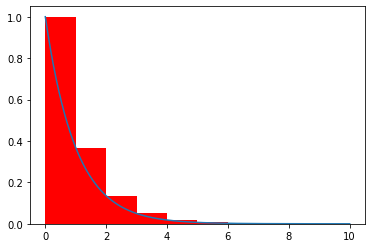

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.bar(x,y,color="red",align="edge",width=1)
x1 = np.linspace(0,10, 1000) # intervalo de 0 a 10, com 1000 divisões
y1=[math.exp(-xi) for xi in x1]
plt.plot(x1,y1)
plt.show()

* Os retângulos acima representam a soma de Riemann pela esquerda ou direita? 

* Se fizermos a soma de Riemann dos retângulos acima, o resultado deveria ser __maior__ ou __menor__ do que a integral analítica? 

In [ ]:
x_i = 0
x_f = 10
dx = 1
x = np.arange(x_i,x_f,dx)
S = 0
for xi in x:
    S = S+ math.exp(-xi)*dx # *dx que e 1 nesse caso
    
print("Soma de 10 caixinhas= ",S)

Soma de 10 caixinhas=  1.5819048852379485


In [ ]:
x_i = 0
x_f = 10
dx = 0.01
n_steps = round((x_f - x_i)/dx)

x = np.arange(x_i,x_f,dx)

S1= 0
for xi in x:
    S1 = S1+ math.exp(-xi) * dx

print(f"Soma de {n_steps} caixinhas = ",S1)

Soma de 1000 caixinhas =  1.0049627060117017


## Exercícios

1. Quantos intervalos (ou qual largura de intervalo) é preciso implementar para ter uma precisão de 1% no resultado numérico na integração de $f(x)$ de 0 a 10? 

$\dfrac{R_{num}-R_{an}}{R_{an}} \leq 10\% $

2. Faça a integração numérica pela esquerda da mesma função. Compare o resultado com a integração pela direita.

3. Faça a integração por trapézios. Lembre que a área de um trapézio é dada por: $A=\frac{(a + b)h}{2}$

3. Faça a integração numérica das funções trigonométricas $\sin(x)$ e $\cos(x)$ num período $0 < x \leq 2\pi$

4. Faça a integração das funções hiperbólicas  $\sinh(x)$ e $\cosh(x)$ no intervalo $0-10$.

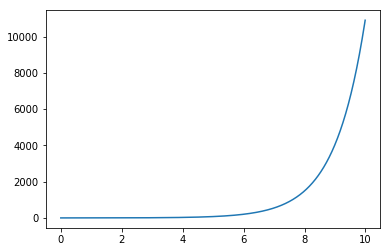

In [ ]:
sh = [math.sinh(xi) for xi in x1]
plt.plot(x1,sh)
plt.show()

### Exercícios extras de resolução numérica de equações diferenciais

1. Imagine que tem um/a maratonista treinando, que num trecho de $5 km$ tem velocidade quase constante de $12 km/h$. Produza uma lista distância percorrida em intervalos de 1 minuto.

1. O/A mesmo/a atleta no seguinte trecho acelera por $200$ metros até chegar em $15 km/h$ por $2 km$. Queremos obter uma tabela ou gráfico da distância percorrida en função do tempo e o tempo total para chegar em $7 km$, faça isto utilizando listas.

1. Considere um péndulo simples num plano. O comprimento da linha é $1$ metro, a massa é $0,2 kg$ e a aceleração de gravidade $9,8 m/s^2$. Faça um gráfico ou crie uma tabela para a posição em coordenadas cartesianas em função do tempo, utilizando listas.


- (opcional) Pesquise sobre o pacote numpy e os objetos desse pacote chamados array, tente utilizálos ao invés de listas para resolver os exercícios.

- (opcional) Pesquise sobre o pacote scipy e seu modulo integrate para resolver integrações ou equações diferenciais numéricamente.


# Análise numérica: resolução de equações diferenciais ordinárias (EDO)

Como resolver o problema quando ao invés de uma integração, onde temos somente um valor final, temos uma equação diferencial, onde **queremos uma série de valores em função de uma variável**.

Tomemos o exemplo do corredor, no primeiro intervalo, onde durante $5 km$ tem velocidade quase constante de $12 km/h$. A função que queremos obter é $d(t)$, com os dados  $d_{final}$, $d_{inicial}$, e $v = \dfrac{\mathrm{d}d}{\mathrm{d}t}$. 

Analiticamente este problema é simples:

$ d(t) = d_{inicial} + v * t $

Então numericamente podemos fazer:


In [ ]:
d_inicial=0
d_final=5
v=12.                           #km/h
t=[i for i in range(0,30)]     #intervalos de 1 minuto, 30 minutos
d = [d_inicial+v/60 * ti for ti in t] # v em km/min

Podemos também ver o gráfico

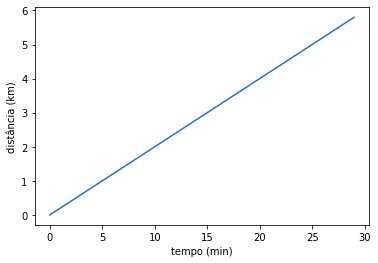

In [ ]:
import matplotlib.pyplot as plt 
plt.plot(t,d)
plt.xlabel('tempo (min)')
plt.ylabel('distância (km)')
plt.show()


Para achar o tempo que demorou em percorrer os 5 kilômetros podemos utilizar a o método ```index``` da lista:

In [ ]:
i=d.index(5)
print("O atleta percorreu {0} kilômetros em {1} minutos".format(d[i],t[i]))

O atleta percorreu 5.0 kilómetros em 25 minutos


## Método de Euler

Se tivermos uma equação diferencial mais complexa, onde seja preciso fazer iterações, podemos utilizar o chamado método de Euler.
<br>
<br>

Vamos considerar $y(t)$ como uma solução da equação diferencial e sua derivada, $y'$, uma função de $t$ e $y(t)$:

<center>
$y' = f(t,y(t)) $ 

e

$y(t_0)=y_0$

</center>

Então podemos dividir o intervalo $t_0$ até $t_{n}$ em $n$ ***intervalos regulares*** de largura _h_

$h =\Delta t = \dfrac{t_{n}-t_0}{n} $,    

ou seja, $t_{n} = t_0 + n* h$ 

e de forma mais geral: $t_i = t_0 +i* h$. 

<br>

Levando em conta que a derivada $y'(t_{n-1}) \approx y'_{n-1} = \frac{\Delta y}{\Delta t} = \frac{y_{n} - y_{n-1}}{h}$, temos que: 

$y'_{n-1}*h = y_{n} - y_{n-1}$

Sendo assim, a aproximação numérica para a $y(t)$ é: 

<br> 

<center>
$\boxed{y(t_n) = y_n = y_{n-1} + y'_{n-1} * h}$ 

e

$y'_n = f(t_n,y_n) $
</center>

<br>

Nesse caso a primeira derivada $y'$ pode depender tanto do $t$ quanto do $y$, e precisamos ter um valor de contorno para $y_0$ e $y'_0$.

![](https://github.com/malbouis/Python_intro/blob/master/aulas/pics/euler.png?raw=true)


Vejamos um exemplo. Consideremos a seguinte equação diferencial com as condições de contorno:

$\frac{dy}{dt} = y$

$y(0) = 1$

$t_0 = 0$

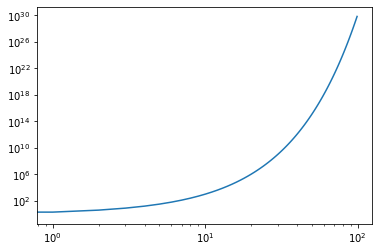

In [ ]:
import math
def f(t, y): 
    """ exemplo de função 
        Nesse exemplo, dy/dt só depende de y.
    """
    return y

t = range(0,100) #t0 = 0
y=[]
y.append(1)      #y_0 = 1

dt = t[1]-t[0] #sabemos que nesse caso o intervalo é 1 pela construção da lista t, mas é melhor colocar para ser geral

for i in range(1,100) :
    yi = y[i-1]  + f(t[i-1],y[i-1]) * dt  #aprox. numérica do método de Euler
    y.append(yi)

plt.yscale('log')
plt.xscale('log')
plt.plot(t,y)
plt.show()

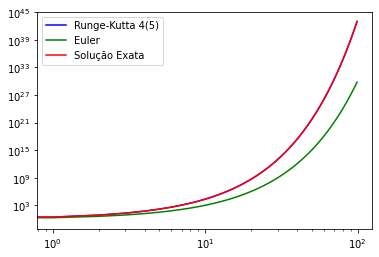

In [ ]:
from scipy.integrate import solve_ivp
#https://docs.scipy.org/doc/scipy/reference/generated/scipy.integrate.solve_ivp.html#scipy.integrate.solve_ivp
import numpy as np
import math

y0 = [1]
t = [i for i in range(0,100)]
sol = solve_ivp(f, [0,100], y0, method='RK45', t_eval=t)
#print(t)
#print(sol)
exp = [math.exp(i) for i in t]

# vamos imprimir para comparar o método de Euler com o padrão da função 'solve_ivp' (RK45)
plt.plot(sol.t, sol.y[0], 'b', label='Runge-Kutta 4(5)')
plt.plot(t,y, 'g', label='Euler')
plt.plot(t, exp, 'r', label='Solução Exata')
plt.yscale('log')
plt.xscale('log')
plt.legend()
plt.show()

Podemos modificar o tamanho dos intervalos regulares do método de Euler e ver se a estimativa pelo método de Euler melhora.

1000 1000


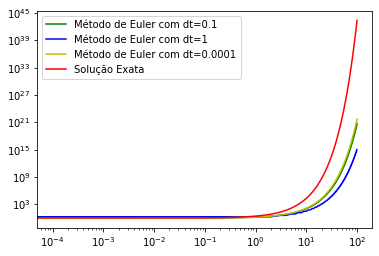

In [ ]:
import math
import numpy as np

def f(t, y): 
    """ exemplo de função 
        Nesse exemplo, dy/dt só depende de y.
    """
    return y

def Euler(fun, t, y0):

  y=[]
  y.append(y0)      
  dt = t[1]-t[0]

  for i in range(len(t)-1) :
    yi = y[i-1]  + fun(t[i-1],y[i-1]) * dt
    y.append(yi)

  return t, y

t = np.arange(0,100, 0.1)
x,y = Euler(f, t, y0=1)

t2 = np.arange(0,100,1)
x2,y2 = Euler(f,t2,y0=1)

t3 = np.arange(0,100,0.0001)
x3,y3 = Euler(f,t3,y0=1)

exp = [math.exp(i) for i in x]
print(len(y), len(x))
plt.plot(x,y, 'g', label='Método de Euler com dt=0.1')
plt.plot(x2,y2, 'b', label='Método de Euler com dt=1')
plt.plot(x3,y3, 'y', label='Método de Euler com dt=0.0001')
plt.plot(t, exp, 'r', label='Solução Exata')

plt.yscale('log')
plt.xscale('log')
plt.legend()

Consideremos agora um segundo exemplo, com a seguinte equação diferencial e condições de contorno:

$y' + 2y = 2 - e^{-4t}$

$y(0) = 1$

O primeiro passo é determinar a função dy/dt:

$y' = 2 - 2y - e^{-4t}$

A solução da EDO pelo método de Euler no ponto $n$ é dada por:

$y_n = y_{n-1} + y'_{n-1}*dt$

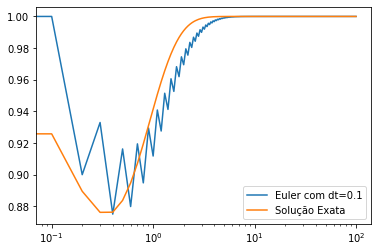

In [ ]:
import math
import numpy as np
import matplotlib.pyplot as plt


def func(t, y):
  return 2 - 2*y - math.exp(-4*t)

def Euler(fun, t, y0):
  y=[]
  y.append(y0)      
  dt = t[1]-t[0]
  for i in range(len(t)-1) :
    yi = y[i-1]  + fun(t[i-1],y[i-1]) * dt
    y.append(yi)
  return t, y

t = np.arange(0,100, 0.1)
x,y = Euler(func, t, y0=1)

# solução analítica é y(t) = 1 + 0.5*e^{-4t} - 0.5*e^{-2t}
y_sol = [1 + 0.5*math.exp(-4*i) - 0.5*math.exp(-2*i) for i in x]

plt.plot(x, y, label='Euler com dt=0.1')
plt.plot(x, y_sol, label='Solução Exata')
#plt.yscale('log')
plt.xscale('log')
plt.legend()

### EDO de segunda ordem

Consideremos a seguinte EDO com suas condições de contorno:

$y'' - y' +3y = t \;\;\;\;$      (1)

$y(0) = 1$

$y'(0) = -2$

Para conseguir resolver essa EDO de segunda ordem, devemos reduzi-la a duas EDOs de primeira ordem:

$y_1(t) := y(t)$

$y_2(t) := y'(t) $

Logo, podemos reescrever a equação (1) como:

$y'_{2} - y_2 + 3y_1 = t \Rightarrow y'_{2} = y_2 - 3y_1 + t$

e

$y'_1 = y_2$

Com as condições de contorno $y_{1}(0)=1$ e $y_2(0)=-2$

Vamos construir o método de Euler para essas EDOs de primeira ordem:

4.177267183031822
-22.160554481346125


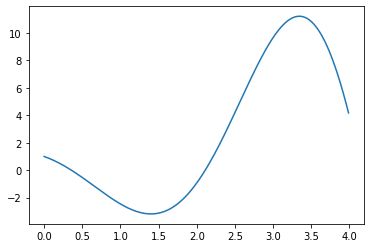

In [ ]:
def y2_prime(y2, y1, t):
  return y2 - 3*y1 + t

def y1_prime(y2):
  return y2

dt = 0.01
t = np.arange(0,4, dt)

y1_0 = 1           # condição de contorno
y1=[]
y1.append(y1_0)

y2_0 = -2          # condição de contorno
y2=[]
y2.append(y2_0)

for i in range(len(t)-1):
  #y1i = y1[i-1] + y1_prime(y2[i-1])*dt
  #y2i = y2[i-1] + y2_prime(y2[i-1], y1[i-1], t[i-1])*dt
  y1i = y1[i] + y1_prime(y2[i])*dt
  y2i = y2[i] + y2_prime(y2[i], y1[i], t[i])*dt

  y1.append(y1i)
  y2.append(y2i)

print(y1[-1])
print(y2[-1])

plt.plot(t, y1)

### O pêndulo simples

No caso da **aceleração** assim como no caso do **pêndulo simples**, a equação diferencial é de segundo grau. 

Nesse caso é necessário na iteração resolver para $v$ e para $x$. 

A expressão para a aceleração pode ser uma função da posição, do tempo e também da velocidade, $a(v,x,t)$.

$ v(t_i)= v_{i} = v_{i-1} + a(v_{i-1},x_{i-1},t_{i-1}) * h $

e

$ x(t_i)= x_{i} = x_{i-1} + v_{i-1} *h $
<br>
<br>

A escolha do valor da velocidade pode ser:
* a velocidade no ponto anterior (**método de Euler**);
* a velocidade atualizada;
* uma média das duas (método do ponto médio). 

### Exercícios extras de resolução numérica de equações  diferenciais (da aula passada)

1. Imagine que tem um/a maratonista treinando, que num trecho de $5 km$ tem velocidade quase constante de $12 km/h$. Produza uma lista distância percorrida em intervalos de 1 minuto.

1. O/A mesmo/a atleta no seguinte trecho acelera por $200$ metros até chegar em $15 km/h$ por $2 km$. Queremos obter uma tabela ou gráfico da distância percorrida en função do tempo e o tempo total para chegar em $7 km$, faça isto utilizando listas.

1. Considere um pêndulo simples num plano. O comprimento da linha é $1$ metro, a massa é $0,2 kg$ e a aceleração de gravidade $9,8 m/s^2$. Faça um gráfico ou crie uma tabela para a posição em coordenadas cartesianas em função do tempo, utilizando listas.

1. Resolva o pêndulo simples com coordenadas polares (ao invés de coordenadas cartesianas).

- (opcional) Pesquise sobre o pacote numpy e os objetos desse pacote chamados array, tente utilizálos ao invés de listas para resolver os exercícios.

- (opcional) Pesquise sobre o pacote scipy e seu modulo integrate para resolver integrações ou equações diferenciais numéricamente.
